In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [4]:
train_data = pd.read_csv("Data Sets/cleaned_training.csv",index_col=0)

# Data Preparation

In [5]:
train_data.drop(index = train_data[(train_data.GrLivArea>4000) & (train_data.SalePrice<300000)].index.tolist(), inplace=True)

In [6]:
train_data["TotLivingSF"] = train_data["GrLivArea"] + train_data["TotalBsmtSF"] - train_data["LowQualFinSF"]
train_data["Age"] = train_data["YrSold"] - train_data["YearBuilt"]

In [7]:
train_data = train_data[["Age","TotLivingSF","MSSubClass","LotFrontage","LotArea","MasVnrArea","Neighborhood","OverallQual","OverallCond","YearBuilt","ExterQual","BsmtQual","BsmtCond","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageCars","GarageArea","GarageQual","GarageCond","PoolQC","YrSold","SaleCondition","SalePrice"]]

In [8]:
train_data["ExterQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
train_data["BsmtQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
train_data["KitchenQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
train_data["FireplaceQu"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)
train_data["GarageQual"].replace({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},inplace=True)

In [9]:
data = train_data.iloc[:,:-1]
data_encoded = pd.get_dummies(data,columns=["MSSubClass","Neighborhood","GarageType"],drop_first = True)

In [10]:
data_encoded[["TotLivingSF","GrLivArea","1stFlrSF"]] = np.log(data_encoded[["TotLivingSF","GrLivArea","1stFlrSF"]])
data_encoded["TotalBsmtSF"] = np.log(data_encoded["TotalBsmtSF"].replace(0, np.nan))
data_encoded["LotArea"] = np.log(data_encoded["LotArea"].replace(0, np.nan))
data_encoded.update(data_encoded["TotalBsmtSF"].fillna(0))
data_encoded["2ndFlrSF"] = np.sqrt(data_encoded["2ndFlrSF"])
data_encoded[["LotFrontage","MasVnrArea"]] = np.cbrt(data_encoded[["LotFrontage","MasVnrArea"]])
data_encoded["OverallQual"] = np.square(data_encoded["OverallQual"])

In [11]:
y = np.log(train_data.iloc[:,-1].values)

#  Assumption 1: Minimal Multicollinearity

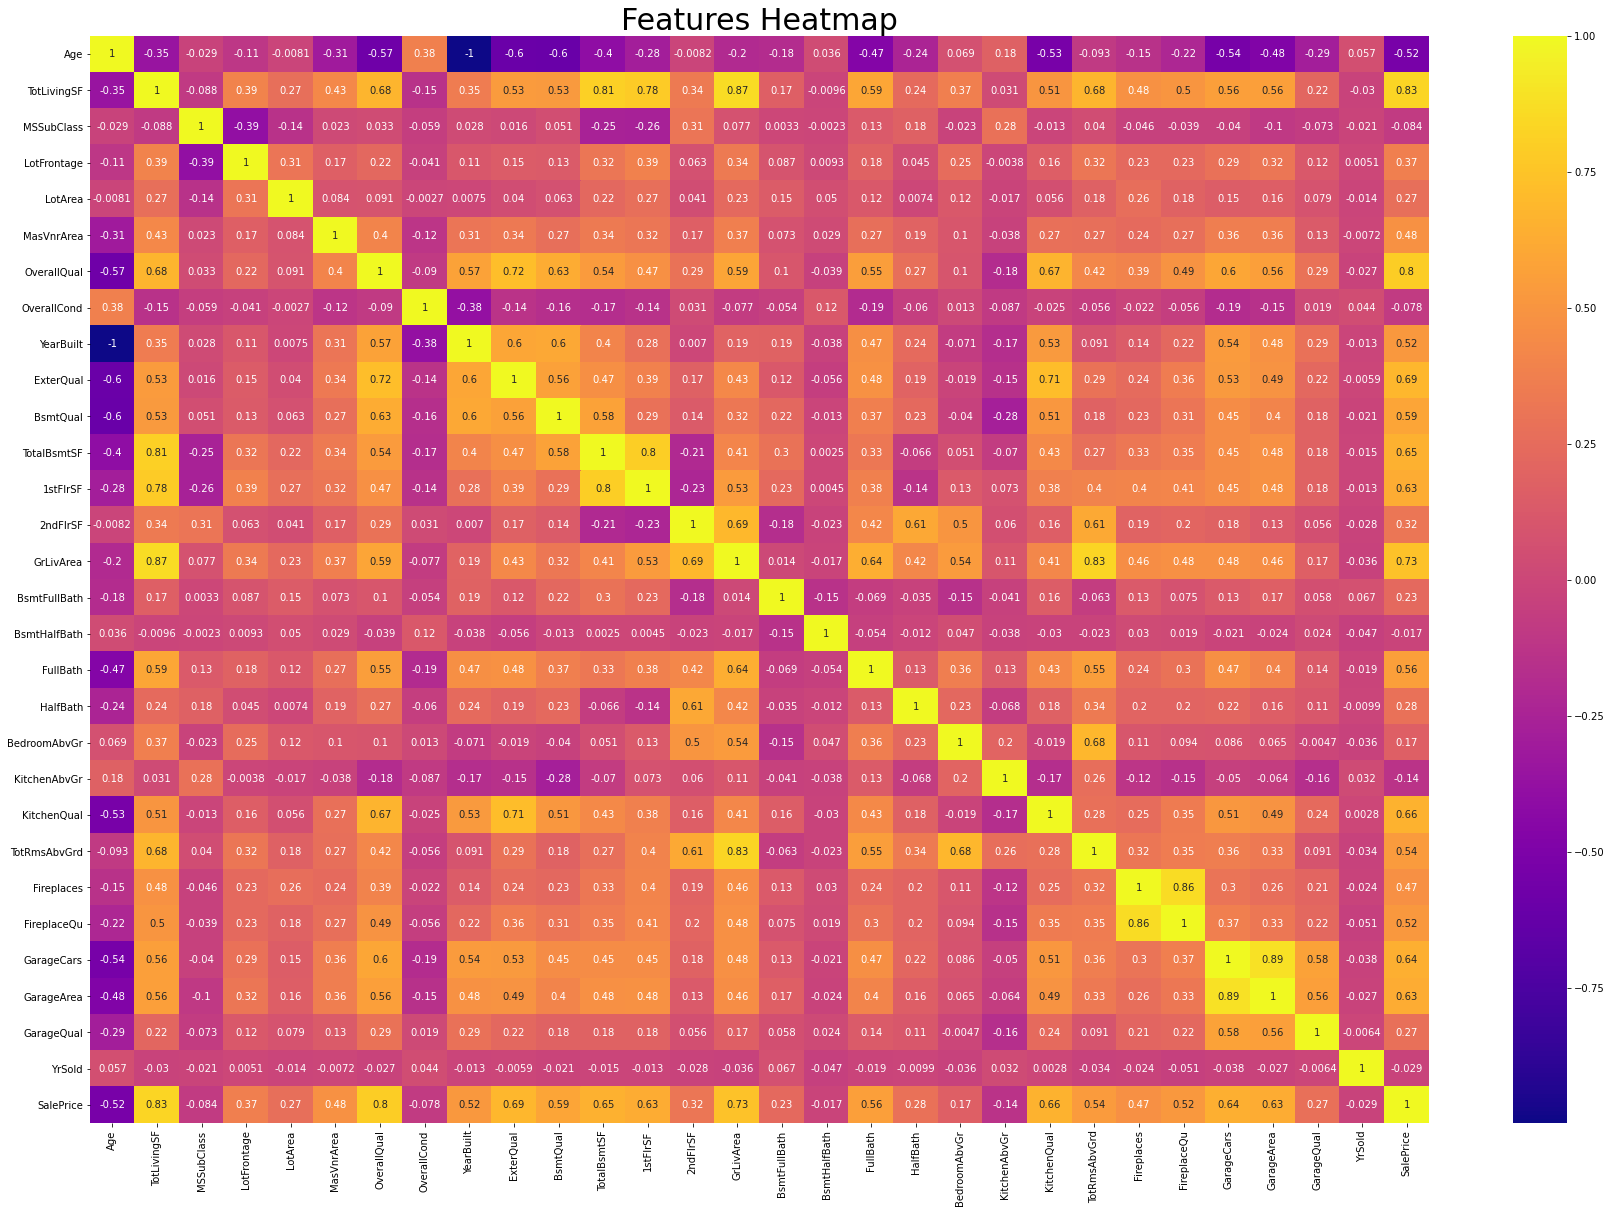

In [12]:
plt.subplots(figsize = (30,20))
sns.heatmap(train_data.corr(), cmap="plasma", annot=True, center = 0, );
plt.title("Features Heatmap", fontsize = 30);

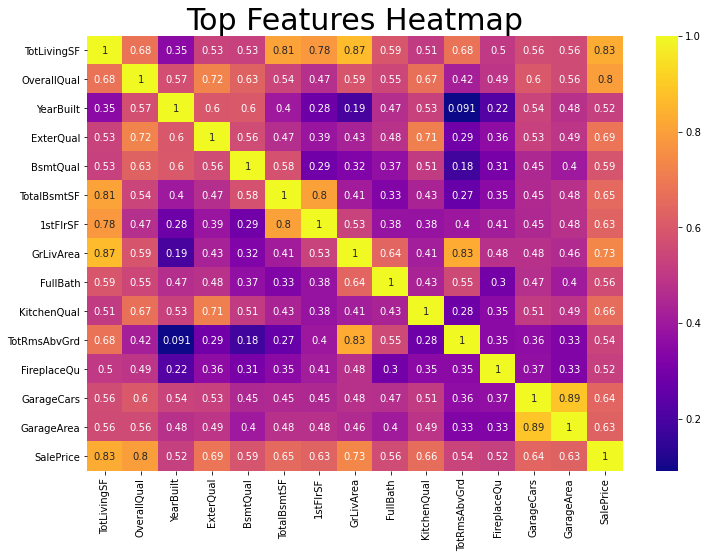

In [13]:
top_feature = train_data.corr().index[abs(train_data.corr()["SalePrice"]>0.5)]
plt.subplots(figsize = (12,8))
top_corr = train_data[top_feature].corr()
sns.heatmap(top_corr, annot=True, cmap="plasma")
plt.title("Top Features Heatmap", fontsize = 30);
plt.show()

# Assumption 2: Linearity

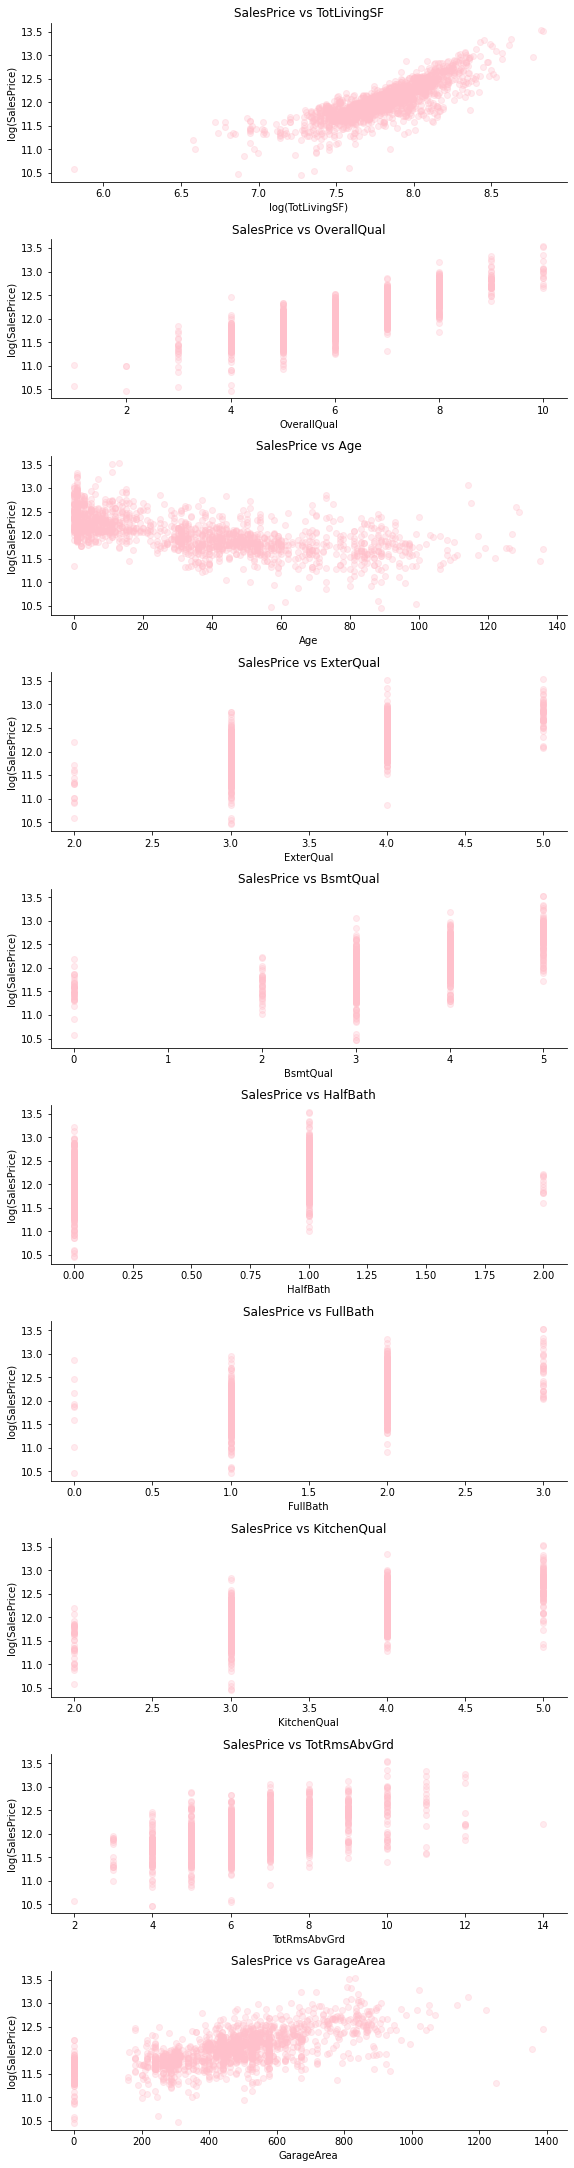

In [14]:
lot_area_fig = plt.figure(constrained_layout=True,figsize=(10,30))
lot_area_grid = gridspec.GridSpec(ncols=3,nrows=10,figure=lot_area_fig)

fig1 = lot_area_fig.add_subplot(lot_area_grid[0, :2])
fig1.set_title("SalesPrice vs TotLivingSF")
plt.scatter(np.log(train_data['TotLivingSF']),np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("log(TotLivingSF)")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()


fig2 = lot_area_fig.add_subplot(lot_area_grid[1, :2])
fig2.set_title("SalesPrice vs OverallQual")
plt.scatter(train_data['OverallQual'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("OverallQual")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()

fig3 = lot_area_fig.add_subplot(lot_area_grid[2, :2])
fig3.set_title("SalesPrice vs Age")
plt.scatter(train_data['Age'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("Age")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()

fig4 = lot_area_fig.add_subplot(lot_area_grid[3, :2])
fig4.set_title("SalesPrice vs ExterQual")
plt.scatter(train_data['ExterQual'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("ExterQual")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()

fig5 = lot_area_fig.add_subplot(lot_area_grid[4, :2])
fig5.set_title("SalesPrice vs BsmtQual")
plt.scatter(train_data['BsmtQual'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("BsmtQual")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()

fig6 = lot_area_fig.add_subplot(lot_area_grid[5, :2])
fig6.set_title("SalesPrice vs HalfBath")
plt.scatter(train_data['HalfBath'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("HalfBath")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()

fig7 = lot_area_fig.add_subplot(lot_area_grid[6, :2])
fig7.set_title("SalesPrice vs FullBath")
plt.scatter(train_data['FullBath'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("FullBath")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()

fig8 = lot_area_fig.add_subplot(lot_area_grid[7, :2])
fig8.set_title("SalesPrice vs KitchenQual")
plt.scatter(train_data['KitchenQual'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("KitchenQual")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()

fig9 = lot_area_fig.add_subplot(lot_area_grid[8, :2])
fig9.set_title("SalesPrice vs TotRmsAbvGrd")
plt.scatter(train_data['TotRmsAbvGrd'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()


fig10 = lot_area_fig.add_subplot(lot_area_grid[9, :2])
fig10.set_title("SalesPrice vs GarageArea")
plt.scatter(train_data['GarageArea'],np.log(train_data['SalePrice']),color="pink",alpha=0.3)
plt.xlabel("GarageArea")
plt.ylabel("log(SalesPrice)")
plt.grid(False)
sns.despine()

plt.show()

# Assumption 3:  Mean of Residuals is Zero

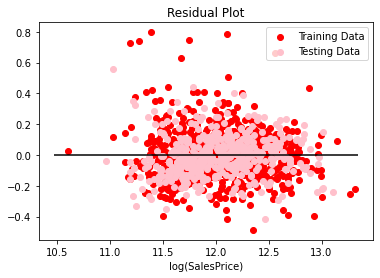

In [15]:
xmrz_data = data_encoded[["TotLivingSF","OverallQual","Age","ExterQual","BsmtQual","HalfBath","FullBath","KitchenQual","TotRmsAbvGrd",
"FireplaceQu","GarageArea","Neighborhood_Blueste","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr",
"Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV","Neighborhood_Mitchel",
"Neighborhood_NAmes","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_OldTown","Neighborhood_SWISU",
"Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker"]]
x = xmrz_data.values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
plt.scatter(regressor.predict(x_train), regressor.predict(x_train) - y_train, c="red", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="pink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.xlabel("log(SalesPrice)")
plt.show()

# Assumptions: Normality

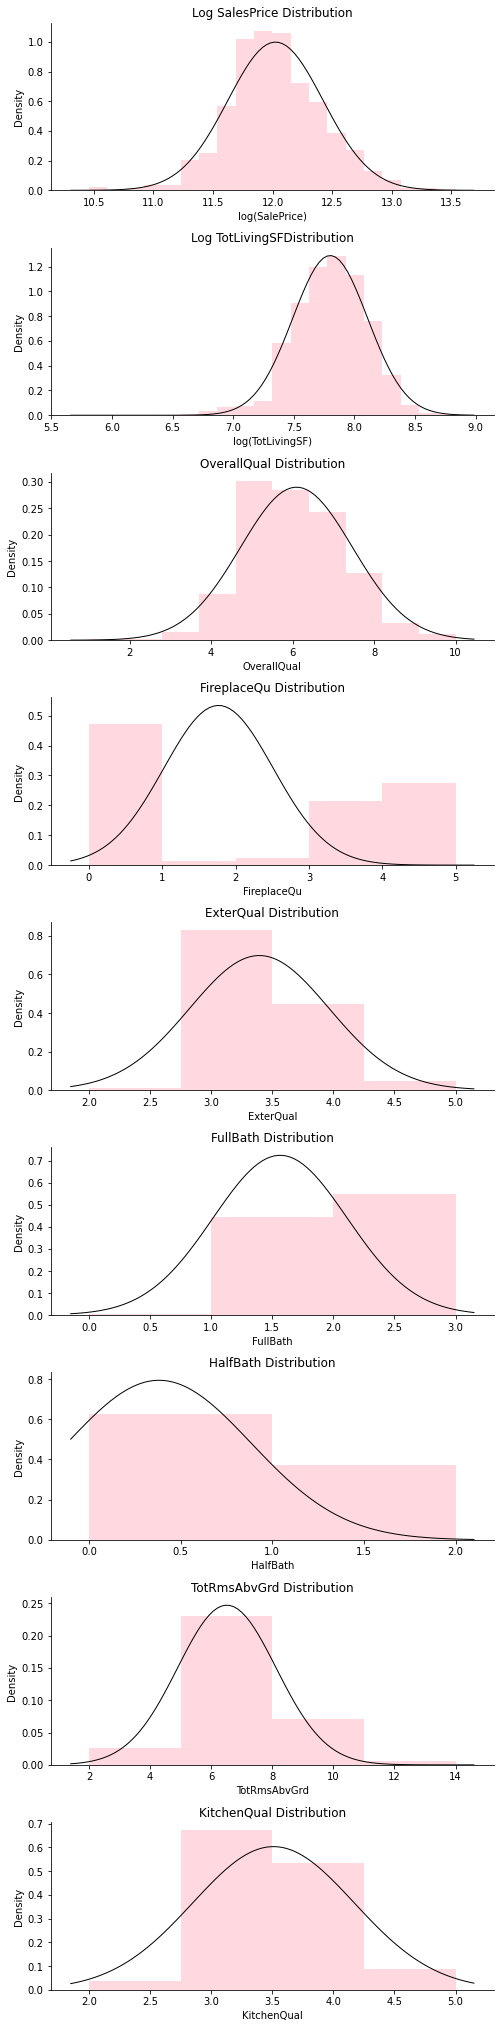

In [16]:

lot_area_fig = plt.figure(constrained_layout=True,figsize=(10,33))
lot_area_grid = gridspec.GridSpec(ncols=3,nrows=11,figure=lot_area_fig)


fig = lot_area_fig.add_subplot(lot_area_grid[0, :2])
fig.set_title("Log SalesPrice Distribution")
mu, std = norm.fit(np.log(train_data["SalePrice"]))
np.log(train_data["SalePrice"]).hist(bins=20,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("log(SalePrice)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig1 = lot_area_fig.add_subplot(lot_area_grid[1, :2])
fig1.set_title("Log TotLivingSFDistribution")
mu, std = norm.fit(np.log(train_data["TotLivingSF"]))
np.log(train_data["TotLivingSF"]).hist(bins=20,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("log(TotLivingSF)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig2 = lot_area_fig.add_subplot(lot_area_grid[2, :2])
fig2.set_title("OverallQual Distribution")
mu, std = norm.fit(train_data["OverallQual"])
train_data["OverallQual"].hist(bins=10,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("OverallQual")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig3 = lot_area_fig.add_subplot(lot_area_grid[3, :2])
fig3.set_title("FireplaceQu Distribution")
mu, std = norm.fit(train_data["GarageCars"])
train_data["FireplaceQu"].hist(bins=5,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("FireplaceQu")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

fig4 = lot_area_fig.add_subplot(lot_area_grid[4, :2])
fig4.set_title("ExterQual Distribution")
mu, std = norm.fit(train_data["ExterQual"])
train_data["ExterQual"].hist(bins=4,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("ExterQual")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig5 = lot_area_fig.add_subplot(lot_area_grid[5, :2])
fig5.set_title("FullBath Distribution")
mu, std = norm.fit(train_data["FullBath"])
train_data["FullBath"].hist(bins=3,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("FullBath")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

fig6 = lot_area_fig.add_subplot(lot_area_grid[6, :2])
fig6.set_title("HalfBath Distribution")
mu, std = norm.fit(train_data["HalfBath"])
train_data["HalfBath"].hist(bins=2,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("HalfBath")
plt.ylabel("Density")
plt.grid(False)
sns.despine()


fig7 = lot_area_fig.add_subplot(lot_area_grid[7, :2])
fig7.set_title("TotRmsAbvGrd Distribution")
mu, std = norm.fit(train_data["TotRmsAbvGrd"])
train_data["TotRmsAbvGrd"].hist(bins=4,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

fig8 = lot_area_fig.add_subplot(lot_area_grid[8, :2])
fig8.set_title("KitchenQual Distribution")
mu, std = norm.fit(train_data["KitchenQual"])
train_data["KitchenQual"].hist(bins=4,color="pink",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.xlabel("KitchenQual")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

plt.show()

# Multiple Regression

In [17]:
x_data = data_encoded[["TotLivingSF","OverallQual","Age","ExterQual","BsmtQual","FullBath","HalfBath","KitchenQual","TotRmsAbvGrd",
"FireplaceQu","GarageArea","Neighborhood_Blueste","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr",
"Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV",
"Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_OldTown",
"Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber",
"Neighborhood_Veenker"]]
x = x_data.values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
x = np.append(arr = np.ones((len(x),1)).astype(int), values = x, axis = 1)
regressor_ols = sm.OLS(endog = y, exog = x).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     305.7
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:30:04   Log-Likelihood:                 811.89
No. Observations:                1458   AIC:                            -1554.
Df Residuals:                    1423   BIC:                            -1369.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9606      0.164     48.552      0.000       7.639       8.282
x1             0.4189      0.024     17.237      0.000       0.371       0.467
x2             0.0057      0.000     13.605      0.000       0.005       0.007
x3            -0.0015      0.000     -5.207      0.000      -0.002      -0.001
x4             0.0109      0.011      0.948      0.343      -0.012       0.033
x5             0.0059      0.007      0.859      0.391      -0.008       0.019
x6             0.0238      0.010      2.269      0.023       0.003       0.044
x7             0.0396      0.009      4.523      0.000       0.022       0.057
x8             0.0651      0.009      7.534      0.000       0.048       0.082
x9             0.0091      0.004      2.423      0.016       0.002       0.016
x10            0.0150      0.003      5.761      0.000       0.010       0.020
x11            0.0002   2.36e-05      9.745      0.000       0.000       0.000
x12           -0.0131      0.104     -0.126      0.900      -0.216       0.190
x13           -0.1002      0.046     -2.154      0.031      -0.191      -0.009
x14            0.1120      0.037      2.993      0.003       0.039       0.185
x15            0.2435      0.040      6.160      0.000       0.166       0.321
x16            0.0931      0.030      3.072      0.002       0.034       0.153
x17            0.2560      0.037      6.963      0.000       0.184       0.328
x18            0.0556      0.033      1.666      0.096      -0.010       0.121
x19            0.0992      0.032      3.080      0.002       0.036       0.162
x20           -0.0851      0.040     -2.103      0.036      -0.165      -0.006
x21           -0.0782      0.045     -1.730      0.084      -0.167       0.010
x22            0.0990      0.035      2.825      0.005       0.030       0.168
x23            0.1037      0.031      3.291      0.001       0.042       0.165
x24            0.0824      0.033      2.497      0.013       0.018       0.147
x25            0.2008      0.036      5.511      0.000       0.129       0.272
x26            0.1200      0.033      3.619      0.000       0.055       0.185
x27            0.0111      0.036      0.307      0.759      -0.060       0.082
x28            0.1010      0.044      2.321      0.020       0.016       0.186
x29            0.1016      0.034      2.986      0.003       0.035       0.168
x30            0.0803      0.033      2.400      0.017       0.015       0.146
x31            0.0883      0.032      2.752      0.006       0.025       0.151
x32            0.1826      0.040      4.554      0.000       0.104       0.261
x33            0.1328      0.036      3.689      0.000       0.062       0.203
x34            0.2210      0.051      4.322      0.000       0.121       0.321
==============================================================================
Om

In [18]:
x_data = data_encoded[["TotLivingSF","OverallQual","Age","ExterQual","BsmtQual","FullBath","HalfBath","KitchenQual","TotRmsAbvGrd",
"FireplaceQu","GarageArea","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr",
"Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV",
"Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt",
"Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber",
"Neighborhood_Veenker"]]
x = x_data.values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
x = np.append(arr = np.ones((len(x),1)).astype(int), values = x, axis = 1)
regressor_ols = sm.OLS(endog = y, exog = x).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     325.3
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:30:04   Log-Likelihood:                 811.82
No. Observations:                1458   AIC:                            -1558.
Df Residuals:                    1425   BIC:                            -1383.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9630      0.163     48.893      0.000       7.644       8.282
x1             0.4194      0.024     17.289      0.000       0.372       0.467
x2             0.0057      0.000     13.616      0.000       0.005       0.007
x3            -0.0015      0.000     -5.680      0.000      -0.002      -0.001
x4             0.0109      0.011      0.948      0.343      -0.012       0.033
x5             0.0057      0.007      0.840      0.401      -0.008       0.019
x6             0.0235      0.010      2.248      0.025       0.003       0.044
x7             0.0395      0.009      4.520      0.000       0.022       0.057
x8             0.0653      0.009      7.576      0.000       0.048       0.082
x9             0.0091      0.004      2.431      0.015       0.002       0.016
x10            0.0149      0.003      5.765      0.000       0.010       0.020
x11            0.0002   2.36e-05      9.768      0.000       0.000       0.000
x12           -0.1073      0.039     -2.747      0.006      -0.184      -0.031
x13            0.1031      0.022      4.632      0.000       0.059       0.147
x14            0.2361      0.030      7.808      0.000       0.177       0.295
x15            0.0871      0.021      4.075      0.000       0.045       0.129
x16            0.2476      0.023     10.562      0.000       0.202       0.294
x17            0.0477      0.019      2.455      0.014       0.010       0.086
x18            0.0936      0.025      3.788      0.000       0.045       0.142
x19           -0.0943      0.026     -3.585      0.000      -0.146      -0.043
x20           -0.0852      0.038     -2.247      0.025      -0.159      -0.011
x21            0.0923      0.026      3.576      0.000       0.042       0.143
x22            0.0959      0.017      5.727      0.000       0.063       0.129
x23            0.0756      0.023      3.338      0.001       0.031       0.120
x24            0.1948      0.029      6.623      0.000       0.137       0.252
x25            0.1144      0.026      4.326      0.000       0.063       0.166
x26            0.0919      0.031      2.975      0.003       0.031       0.152
x27            0.0940      0.022      4.323      0.000       0.051       0.137
x28            0.0739      0.025      3.001      0.003       0.026       0.122
x29            0.0827      0.025      3.333      0.001       0.034       0.131
x30            0.1767      0.034      5.178      0.000       0.110       0.244
x31            0.1267      0.029      4.415      0.000       0.070       0.183
x32            0.2144      0.046      4.710      0.000       0.125       0.304
==============================================================================
Omnibus:                      298.755   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1182.927
Sk

In [19]:
x_data = data_encoded[["TotLivingSF","OverallQual","Age","BsmtQual","FullBath","HalfBath","KitchenQual","TotRmsAbvGrd",
"FireplaceQu","GarageArea","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr",
"Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV",
"Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt",
"Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber",
"Neighborhood_Veenker"]]
x = x_data.values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
x = np.append(arr = np.ones((len(x),1)).astype(int), values = x, axis = 1)
regressor_ols = sm.OLS(endog = y, exog = x).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     335.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:30:04   Log-Likelihood:                 811.36
No. Observations:                1458   AIC:                            -1559.
Df Residuals:                    1426   BIC:                            -1390.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9835      0.161     49.460      0.000       7.667       8.300
x1             0.4197      0.024     17.304      0.000       0.372       0.467
x2             0.0059      0.000     14.391      0.000       0.005       0.007
x3            -0.0015      0.000     -5.857      0.000      -0.002      -0.001
x4             0.0059      0.007      0.872      0.383      -0.007       0.019
x5             0.0239      0.010      2.284      0.023       0.003       0.044
x6             0.0393      0.009      4.501      0.000       0.022       0.056
x7             0.0680      0.008      8.348      0.000       0.052       0.084
x8             0.0091      0.004      2.436      0.015       0.002       0.016
x9             0.0149      0.003      5.784      0.000       0.010       0.020
x10            0.0002   2.36e-05      9.766      0.000       0.000       0.000
x11           -0.1090      0.039     -2.794      0.005      -0.186      -0.032
x12            0.1035      0.022      4.652      0.000       0.060       0.147
x13            0.2350      0.030      7.776      0.000       0.176       0.294
x14            0.0882      0.021      4.137      0.000       0.046       0.130
x15            0.2480      0.023     10.578      0.000       0.202       0.294
x16            0.0477      0.019      2.458      0.014       0.010       0.086
x17            0.0938      0.025      3.799      0.000       0.045       0.142
x18           -0.0947      0.026     -3.603      0.000      -0.146      -0.043
x19           -0.0861      0.038     -2.273      0.023      -0.160      -0.012
x20            0.0906      0.026      3.518      0.000       0.040       0.141
x21            0.0951      0.017      5.688      0.000       0.062       0.128
x22            0.0733      0.023      3.254      0.001       0.029       0.117
x23            0.1967      0.029      6.707      0.000       0.139       0.254
x24            0.1174      0.026      4.469      0.000       0.066       0.169
x25            0.0917      0.031      2.970      0.003       0.031       0.152
x26            0.0932      0.022      4.288      0.000       0.051       0.136
x27            0.0744      0.025      3.020      0.003       0.026       0.123
x28            0.0847      0.025      3.425      0.001       0.036       0.133
x29            0.1786      0.034      5.242      0.000       0.112       0.245
x30            0.1268      0.029      4.419      0.000       0.070       0.183
x31            0.2161      0.045      4.750      0.000       0.127       0.305
==============================================================================
Omnibus:                      296.976   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1171.743
Skew:                          -0.935   Prob(JB):                    3.63e-255
Ku

Training Score: 0.8718585815039711
Testing Score: 0.8934925364287553
MSE of Test: 0.01800516803226797
MSE of Train: 0.019942418643386254


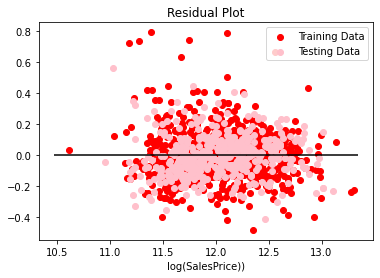

In [20]:
training_score = regressor.score(x_train, y_train)
testing_score = regressor.score(x_test, y_test)
MSE = mean_squared_error(y_test,y_pred)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"MSE of Test: {MSE}")

y_pred_train = regressor.predict(x_train)
training_score = regressor.score(x_train, y_train)
testing_score = regressor.score(x_test, y_test)
MSE2 = mean_squared_error(y_train,y_pred_train)
print(f"MSE of Train: {MSE2}")


plt.scatter(regressor.predict(x_train), regressor.predict(x_train) - y_train, c="red", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="pink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.xlabel("log(SalesPrice))")
plt.show()

In [21]:
actual_predictions = pd.DataFrame({"actual":y_test,"predictions":y_pred})
actual_predictions[["actual","predictions"]] = np.exp(actual_predictions[["actual","predictions"]])
actual_predictions.to_csv("Predictions/multiple_regression.csv",header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Predictions/multiple_regression.csv'